## Relationship Survey Data Set- EDA

This data is provided by customers who have not had any policy changes/interactions with the company in a while as a check in with their satisfaction. 

- about 50k rows
- 2017-2020 data

In [1]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set()
#%matplotlib inline

In [2]:
rel = pd.read_csv('REL Data.csv')
rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50234 entries, 0 to 50233
Data columns (total 6 columns):
REL ID                         50234 non-null int64
REL Respid                     50234 non-null int64
Combined Interview End Date    50234 non-null object
REL Primary Reason             50234 non-null object
REL Reason Other               50231 non-null object
REL Primary Reason Comments    50214 non-null object
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


In [6]:
#rename columns so there are no spaces/easier to work with later on

rel = rel.rename(columns={'Combined Interview End Date':'Date','REL Primary Reason':'Reason','REL Reason Other': 'OtherReason', 'REL Primary Reason Comments': 'Comments'})
rel.head()

,REL ID,REL Respid,Date,Reason,OtherReason,Comments
0,2,392057,1/9/2017,Claims Service,'-,When we've had claims Amica has responded very...
1,3,392063,1/9/2017,Price,'-,For the quality of service I think it's a grea...
2,4,392070,1/9/2017,Price,'-,because everyone would like to pay the least f...
3,5,392089,1/9/2017,Price,'-,I feel the pricing is excellent
4,6,392099,1/9/2017,Price,'-,Who wants to pay more for the same thing? Next...


In [9]:
#remove nulls in comments section

rel['Comments'] = rel['Comments'].fillna("")
rel.isna().sum()

REL ID         0
REL Respid     0
Date           0
Reason         0
OtherReason    3
Comments       0
dtype: int64

In [10]:
rel['Reason'].value_counts()

Claims Service                 12656
Price                          10208
Reputation                      9445
Policy Service - Non Claims     6870
reason_99_other                 2950
'-                              2724
Product Offerings               1769
Billing Options                 1488
Financial Strength              1229
Website                          707
Life                             126
Mobile App                        62
Name: Reason, dtype: int64

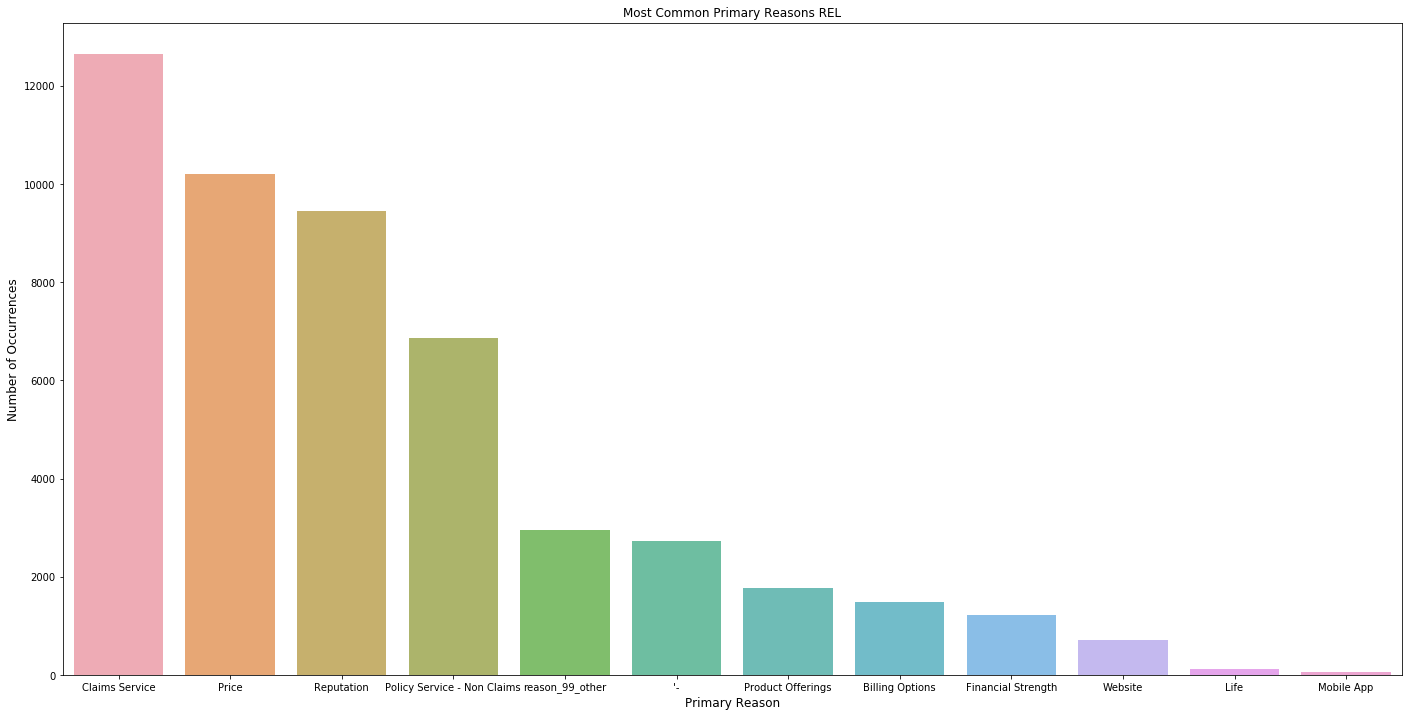

In [12]:
rel_reasons = rel['Reason'].value_counts()
#rel_reasons = rel_reasons[:7]
plt.figure(figsize=(24,12))
sns.barplot(rel_reasons.index, rel_reasons.values, alpha=0.8)
plt.title('Most Common Primary Reasons REL')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Primary Reason', fontsize=12)
plt.show()